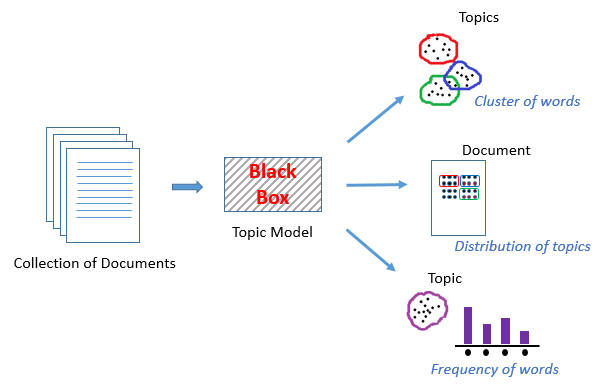

##SVD 


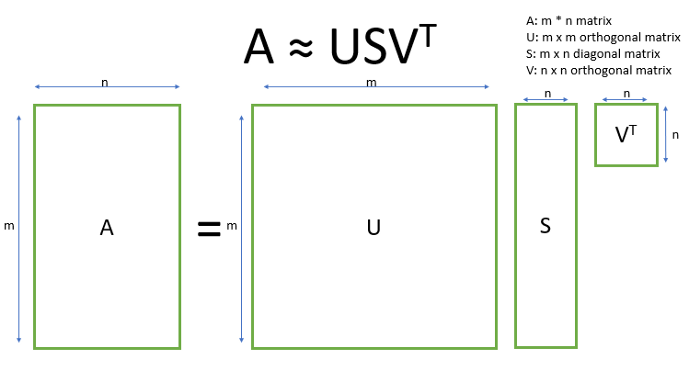

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from string import punctuation
import nltk
pi = math.pi

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
inp = ['/content/drive/MyDrive/LAB6/file_1.txt','/content/drive/MyDrive/LAB6/file_2.txt',
'/content/drive/MyDrive/LAB6/file_3.txt', '/content/drive/MyDrive/LAB6/file_4.txt', '/content/drive/MyDrive/LAB6/file_5.txt']

In [ ]:
def rem_punct(s):
    '''
    Parameter: 
        s - string
    Process:
        First we initialize an empty output string str1.
        The function iterates through s and if the character is not a punctation, 
        it is added to the outpur string str1.
    Output:
        str1 - string
    '''
    str1 = ''
    for char in s:
        if(char not in punctuation):
            str1 = str1 + char
    return str1

def rem_nums(s):
    '''
    Parameter: 
        s - string
    Process:
        First we initialize an empty output string str1.
        The function iterates through s and if the character is not a number, 
        it is added to the outpur string str1.
    Output:
        str1 - string
    '''
    str1 = ''
    for num in s:
        if(not num.isdigit()):
            str1 = str1 + num
    return str1


In [ ]:


docs = len(inp) #number of documents
store =[] #list of content of all docs. stored as a string 

for i in range(len(inp)):
    file = open(inp[i],'r')
    string = ''
    while 1: 
        # read by character 
        char = file.read(1)
        if char!='\n':
            string+=char
        if not char:  
            break
    store.append(string)
    file.close



stopwords = nltk.corpus.stopwords.words('english')

all_docs = []
for string in store:
    string = rem_punct(rem_nums(string).lower())
    string = string.split(" ")
    all_docs.append(string)

bow=[] #bag of words
for j in range(docs):
    temp = []
    for i in all_docs[j]: #all_docs[j] is the jth document's list of words
        if i not in stopwords and len(i)>0 and i!=None:
            temp.append(i)
            #print(i)
    bow.append(temp)
print(bow)

[['linear', 'algebra', 'singular', 'value', 'decomposition', 'svd', 'matrix', 'factorization', 'matrix', 'three', 'matrices', 'interesting', 'algebraic', 'properties', 'conveys', 'important', 'geometrical', 'theoretical', 'insights', 'linear', 'transformations', 'realize', 'common', 'questions', 'nonbeginners', 'may', 'ask', 'let', 'address', 'elephant', 'room', 'first'], ['also', 'important', 'applications', 'data', 'science', 'article', 'try', 'explain', 'mathematical', 'intuition', 'behind', 'svd', 'geometrical', 'meaning', 'instead', 'manual', 'calculations', 'use', 'python', 'libraries', 'calculations', 'later', 'give', 'examples', 'using', 'svd', 'data', 'science', 'applications', 'pca', 'dimension', 'reduction', 'pca', 'reduces', 'dimension', 'far'], ['article', 'boldface', 'lowercase', 'letters', 'like', 'refer', 'vectors', 'boldface', 'capital', 'letters', 'like', 'refer', 'matrices', 'italic', 'lowercase', 'letters', 'like', 'refer', 'scalars', 'answer', 'questions', 'interes

In [ ]:

def unique(bow):
    '''
    Parameter: 
        bow - 2D list
    Process:
        a is initialized as first list of bow
        
        The function iterates through all other lists and sets
        a = union(a,cur_list)
        Here cur_list is the iterator
    Output:
        a - set of all unique words in bow
    '''
    a = bow[0]
    for i in range(1,len(bow)):
        a = set(a).union(set(bow[i]))
    print(a)
    return a

wordset = unique(bow)


{'common', 'focus', 'according', 'matrix', 'simplified', 'finding', 'allows', 'article', 'transformations', 'realize', 'used', 'pca', 'numbers', 'try', 'mathematical', 'give', 'first', 'meaning', 'value', 'science', 'behind', 'applications', 'given', 'simpler', 'factorization', 'elephant', 'known', 'vectors', 'eigendecomposition', 'like', 'dimension', 'highdimensional', 'find', 'detail', 'explain', 'boldface', 'constituent', 'theoretical', 'instead', 'later', 'also', 'linearly', 'correlated', 'perspective', 'basis', 'svd', 'method', 'singularvalue', 'widely', 'stable', 'certain', 'letters', 'sections', 'free', 'contains', 'obviously', 'decomposition', 'insights', 'may', 'skip', 'italic', 'manual', 'interest', 'data', 'let', 'methods', 'python', 'subsequent', 'using', 'information', 'case', 'interesting', 'feel', 'ask', 'address', 'example', 'describing', 'simplicity', 'reducing', 'parts', 'ignore', 'order', 'algebra', 'us', 'elements', 'transforms', 'questions', 'less', 'even', 'algebr

In [ ]:
def term_document_matrix():
    '''
    Parameter: 
        Nothing
    Process:
        Iterates through bow and worddict at the same time 
        bow - 2D list  (iterator is bow_i)
        worddict = list of dictionaries    (iterator is worddict_i)
        increments value of each word found in bow_i
    Output:
        pandas dataframe
    '''
    for bow_i,worddict_i in zip(bow,worddict): #zip takes first row of bow and key of worddict
        for word in bow_i:
            worddict_i[word]+=1 #increments value of each word when found in the document
        
    return pd.DataFrame(worddict)
#The above function returns a document term matrix.
#from this we get number of times a unique word is found in each document respectively.


In [ ]:


worddict = [dict.fromkeys(wordset,0) for i in range(len(bow))]
docterm = term_document_matrix()
print(docterm)

   common  focus  according  matrix  ...  harder  geometrical  original  extract
0       1      0          0       2  ...       0            1         0        0
1       0      0          0       0  ...       0            1         0        0
2       0      0          1       0  ...       0            0         0        0
3       0      0          0       5  ...       0            0         1        0
4       0      1          0       3  ...       1            0         0        1

[5 rows x 133 columns]


In [ ]:
def term_freq(worddict,bow):
    '''
    Parameter: 
        worddict - dictionary
        bow - list of strings 
    Process:
        initialize empty dictionary called tfdict
        bowcount = number of elements(words) in bow
        traverse through key value pairs of worddict
        Here,
            word - key
            count - value
        Divide count of a word by total number of elements in that document and store it as a 
        key value pair in tfdict
    Output:
        tfdict - dictionary
    '''
    #here worddict is a single dictionary. NOT A LIST OF DICTIONARIES
    #bow is a single list. NOT A NESTED LIST
    tfdict = {} #tfdict -- term frequency dict
    bowcount = len(bow) #bowcount = total number of words in the document 
    for word,count in worddict.items(): 
        tfdict[word] = count/float(bowcount)
    return tfdict


In [ ]:
tfbow = []
for i,j in zip(worddict,bow): #worddict is a list of dictionaries
    tfbow.append(term_freq(i,j))

#tfbow is a list of dictionaries. ith dictionary in tfbow is the tfdict of ith document 

print(tfbow)

[{'common': 0.03125, 'focus': 0.0, 'according': 0.0, 'matrix': 0.0625, 'simplified': 0.0, 'finding': 0.0, 'allows': 0.0, 'article': 0.0, 'transformations': 0.03125, 'realize': 0.03125, 'used': 0.0, 'pca': 0.0, 'numbers': 0.0, 'try': 0.0, 'mathematical': 0.0, 'give': 0.0, 'first': 0.03125, 'meaning': 0.0, 'value': 0.03125, 'science': 0.0, 'behind': 0.0, 'applications': 0.0, 'given': 0.0, 'simpler': 0.0, 'factorization': 0.03125, 'elephant': 0.03125, 'known': 0.0, 'vectors': 0.0, 'eigendecomposition': 0.0, 'like': 0.0, 'dimension': 0.0, 'highdimensional': 0.0, 'find': 0.0, 'detail': 0.0, 'explain': 0.0, 'boldface': 0.0, 'constituent': 0.0, 'theoretical': 0.03125, 'instead': 0.0, 'later': 0.0, 'also': 0.0, 'linearly': 0.0, 'correlated': 0.0, 'perspective': 0.0, 'basis': 0.0, 'svd': 0.03125, 'method': 0.0, 'singularvalue': 0.0, 'widely': 0.0, 'stable': 0.0, 'certain': 0.0, 'letters': 0.0, 'sections': 0.0, 'free': 0.0, 'contains': 0.0, 'obviously': 0.0, 'decomposition': 0.03125, 'insights':

In [ ]:
def idf(doclist):
    '''
    Parameters:
        doclist - list of dictionaries 
    Process:
        returns a dictionary containing key value pairs of words and number of documents
        that words occurs in. 
        The process is described in detail below.
    Output:
        idfdict - dictionary 
    '''
    idfdict={}
    n = len(doclist)
    idfdict = dict.fromkeys(doclist[0].keys(),0)
    #initializes idfdict as a dictionary which has same keys as doclist[0] and value of each key is 0
    for doc in doclist:
        for word,val in doc.items():
            if val>0:
                idfdict[word]+=1
    #now idfdict has total occurences of each word in all of the documents
    #note that multiple occurences of a word in one document is considered as 1
    #hence if value of a key is... for eg: {'king':2,....} 
    #this means that the word king has appeared in 2 documents
    for word,val in idfdict.items():
        idfdict[word]=math.log(n/float(val)) 
        #computes log (total num of documents/no. of documents that contain a particular word)n
    return idfdict


In [ ]:

idfs = idf(worddict) #stores idf value of all words
print(idfs)

{'common': 1.6094379124341003, 'focus': 1.6094379124341003, 'according': 1.6094379124341003, 'matrix': 0.5108256237659907, 'simplified': 1.6094379124341003, 'finding': 1.6094379124341003, 'allows': 1.6094379124341003, 'article': 0.5108256237659907, 'transformations': 1.6094379124341003, 'realize': 1.6094379124341003, 'used': 1.6094379124341003, 'pca': 0.22314355131420976, 'numbers': 1.6094379124341003, 'try': 1.6094379124341003, 'mathematical': 1.6094379124341003, 'give': 1.6094379124341003, 'first': 1.6094379124341003, 'meaning': 1.6094379124341003, 'value': 1.6094379124341003, 'science': 1.6094379124341003, 'behind': 1.6094379124341003, 'applications': 1.6094379124341003, 'given': 1.6094379124341003, 'simpler': 1.6094379124341003, 'factorization': 0.9162907318741551, 'elephant': 1.6094379124341003, 'known': 1.6094379124341003, 'vectors': 0.9162907318741551, 'eigendecomposition': 1.6094379124341003, 'like': 0.9162907318741551, 'dimension': 1.6094379124341003, 'highdimensional': 1.6094

In [ ]:
def tfidf(tfbow_dict,idfs):
    '''
    Parameter: 
        tfbow_dict - dictionary 
        idfs - dictionary
    Process:
        multiplies term frequency with idf of each term 
    Output: 
        tfidf - dictionary
    '''
    tfidf = {}
    for word,val in tfbow_dict.items():
        tfidf[word]=val*idfs[word] #multiply term freq with idf for each term 
    return tfidf


In [ ]:

tfidfl = [] 
for i in tfbow:
    tfidfl.append(tfidf(i,idfs))  
#Above loop iterates through list of dictionaries tfbow. 
#Appends output of tfidf function(a dictionary) to tfidfl
print(tfidfl)

[{'common': 0.050294934763565634, 'focus': 0.0, 'according': 0.0, 'matrix': 0.03192660148537442, 'simplified': 0.0, 'finding': 0.0, 'allows': 0.0, 'article': 0.0, 'transformations': 0.050294934763565634, 'realize': 0.050294934763565634, 'used': 0.0, 'pca': 0.0, 'numbers': 0.0, 'try': 0.0, 'mathematical': 0.0, 'give': 0.0, 'first': 0.050294934763565634, 'meaning': 0.0, 'value': 0.050294934763565634, 'science': 0.0, 'behind': 0.0, 'applications': 0.0, 'given': 0.0, 'simpler': 0.0, 'factorization': 0.028634085371067347, 'elephant': 0.050294934763565634, 'known': 0.0, 'vectors': 0.0, 'eigendecomposition': 0.0, 'like': 0.0, 'dimension': 0.0, 'highdimensional': 0.0, 'find': 0.0, 'detail': 0.0, 'explain': 0.0, 'boldface': 0.0, 'constituent': 0.0, 'theoretical': 0.050294934763565634, 'instead': 0.0, 'later': 0.0, 'also': 0.0, 'linearly': 0.0, 'correlated': 0.0, 'perspective': 0.0, 'basis': 0.0, 'svd': 0.006973235978569055, 'method': 0.0, 'singularvalue': 0.0, 'widely': 0.0, 'stable': 0.0, 'cer

In [ ]:

def transpose(A):
    '''
    Parameter: 
        A - 2D matrix having dimension m*n
    Process:
        Calculates transpose of given matrix
    Output:
        ans - 2D matrix having dimension n*m
    '''
    ans = np.zeros((len(A[0]),len(A)))
    for i in range(len(A)):
        for j in range(len(A[0])):
            ans[j][i] = A[i][j]
    return ans


In [ ]:
def matmul(A,X):
    '''
    Parameter: 
        A - 2D matrix having dimension m*r
        X - 2D matrix having dimension r*n
    Process:
        matrix multiplication of A and X
    Output:
        ans - 2D matrix having dimension m*n
    '''
    
    if(type(X)!=list and len(X.shape)==1):
        X = X.reshape((len(X), 1))
    ans = np.zeros((len(A),len(X[0])))
    for i in range(len(A)):
        for j in range(len(X[0])):
            for k in range(len(X)):
                ans[i][j] = ans[i][j] + A[i][k]*X[k][j]
    if(type(X)!=list and ans.shape[1]==1):
        ans = ans.reshape((len(ans)))
    return ans


In [ ]:
def SvD(Amatrix):
    '''
    Parameter:
        Amatrix - matrix to be decomposed of dimension m*n
    Process:
        Implements Jacobi method to find eigenvalues and eigenvectors.
        So, eigenvectors are in the V matrix. 
        S is a list of singular values of Amatrix. To find S, we just find square root 
        eigenvlues of Amatrix.
        We then find UMatrix using the formula U_i = (Amatrix*V_i)/Sigma_i 
    Output:
        U - Orthogonal matrix of dimension m*m 
        S - List of singular values of Amatrix
        VT - Transpose of orthogonal matrix V having dimensions n*n
    '''
    originalMatrix = Amatrix.copy()
    
    UMatrix,finSingVals,VT = svd(originalMatrix)
    
    return UMatrix,finSingVals,VT


In [ ]:
X = pd.DataFrame(tfidfl).T
l_2d = X.T.values.tolist()
l_2d = np.array(l_2d)
l_2d = transpose(l_2d)
L,S,R=SvD(l_2d)

In [ ]:
print(L.shape,S.shape,R.shape)

(133, 133) (5,) (5, 5)


In [ ]:
S

array([0.27106847, 0.25752734, 0.24897825, 0.20842822, 0.18828116])

In [ ]:

def zero_padding(n,U,S,V):
    '''
    Parameter: 
        n - integer
        U - Matrix having dimension m*m
        S - List of singular values
        V - Matrix having dimension n*n
    Process:
        The aim of this function is to use S to make a matrix A which contains n singular 
        values on its diagonal. Rest all values are 0. Dimensions of A are m*n
        Basically, we want to make A such that multiply(U,A,V) is possible
    Output:
        A - Matrix having dimension m*n
    '''
    t = []
    for i in range(0,n):
        t.append(S[i])
    #t is the tuple consisting of first n characters of the tuple S (S is sigma)
    for i in range(len(S)-n):
        t.append(0) #zero_padding t with zeros
    
    #convert the non-selected singular values to 0 and form a diagonal matrix, store as A
    A=[]
    for i in range (0,len(S)):
        temp = []
        for j in range(0,len(S)):
            if(j == i):
                temp.append(float(t[j]))
            else:
                temp.append(float(0))
        A.append(temp)
    newrow = []
    for i in range(0,len(S)):
        newrow.append(0)
    #newrow is a list of zeros having same length as S
    for i in range(len(U)-len(S)): 
        A.append(newrow)
    return A

def reconstruct(u,s,v,n):
    '''
    Parameter: 
        u - Matrix having dimension m*m
        s - List of singular values
        v - Matrix having dimension n*n
        n - integer
    Process:
        produces matrix A having m*n dimensions.
        Returns the product of multiply(u,A,v)
    Output:
        m*n matrix
    '''
    A=zero_padding(n,u,s,v)
    return np.round(matmul(matmul(u,A),v),decimals=3)
    
def frobenius(a,a2): #finds how similar two matrices are
    '''
    Parameter: 
        a - Matrix having dimension m*n
        a2 - Matrix having dimension m*n
    Process:
        computes the frobenius norm of the matrix
    Output:
        an integer (frobenius norm of the two matrices)
    '''
    
    tempi1=(a-a2)**2
    tempi2=a**2
    sum1,sum2=0,0
    
    for i in (tempi1):
        for j in (i):
            sum1+=j
    for i in (tempi2):
        for j in (i):
            sum2+=j
    ret = math.sqrt(sum1)/math.sqrt(sum2)
    return ret 

def search(q):
    q=rem_punct(q)
    q=q.lower().split(" ")
    terms = X.index
    
    query=[]
    for i in terms:
        if(i in q):
            query.append(1)
        else:
            query.append(0) 
    query=np.asarray(query)
    if 1 not in query:
        print("Could not find any documents")
    
    else:
        k = 3 # as told we are u wsing a consstant value of k not that find_k()
        print("q",query)
        reconstructed_A = reconstruct(L,S,R,k) 
        print(reconstructed_A)

        score = query.dot(reconstructed_A)
        
        sort = {}
        for i in range(len(score)):
            if(score[i]<0):
                score[i]=0
            sort[i+1] = score[i]
        last = {}
        for w in sorted(sort, key=sort.get, reverse=True):
            last[w]=sort[w]
        xAxis=[]
        title="Document-wise weightage of the string: "
        for i in q: 
            title=title+" "+i
        yAxis=[]
        
        for document,sc in last.items():
            print("Document: ",document)
            xAxis.append(document)
            yAxis.append(sc)
        
        plt.bar(xAxis, yAxis, color ='red',  
                width = 0.4) 
        
        plt.xlabel("Document number") 
        plt.ylabel("Relevance-Score") 
        plt.title(title) 
        plt.show() 



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
1
Enter keyword you want to search

matrix
Loading your search results...
q [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.049 -0.001 -0.     0.007  0.004]
 [ 0.002  0.003  0.001  0.001  0.   ]
 [-0.    -0.     0.036  0.001  0.002]
 [ 0.042  0.007  0.002  0.007  0.004]
 [-0.    -0.     0.036  0.001  0.002]
 [ 0.002  0.003  0.001  0.001  0.   ]
 [ 0.002  0.003  0.001  0.001  0.   ]
 [ 0.     0.015  0.024  0.002  0.002]
 [ 0.049 -0.001 -0.     0.007  0.004]
 [ 0.049 -0.001 -0.     0.007  0.004]
 [ 0.005  0.003  0.001  0.001  0.001]
 [ 0.001  0.013  0.005  0.001  0.001]
 [ 0.002  0.003  0.001  0.001  0.   ]
 [-0.001  0.044 -0.     0.004  0.004]
 [-0.001  0.044 -0.     0.004  0.004]
 [-0.001  0

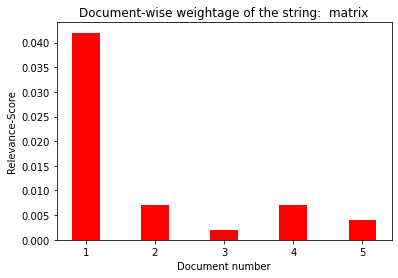



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
1
Enter keyword you want to search

matrix vector
Loading your search results...
q [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.049 -0.001 -0.     0.007  0.004]
 [ 0.002  0.003  0.001  0.001  0.   ]
 [-0.    -0.     0.036  0.001  0.002]
 [ 0.042  0.007  0.002  0.007  0.004]
 [-0.    -0.     0.036  0.001  0.002]
 [ 0.002  0.003  0.001  0.001  0.   ]
 [ 0.002  0.003  0.001  0.001  0.   ]
 [ 0.     0.015  0.024  0.002  0.002]
 [ 0.049 -0.001 -0.     0.007  0.004]
 [ 0.049 -0.001 -0.     0.007  0.004]
 [ 0.005  0.003  0.001  0.001  0.001]
 [ 0.001  0.013  0.005  0.001  0.001]
 [ 0.002  0.003  0.001  0.001  0.   ]
 [-0.001  0.044 -0.     0.004  0.004]
 [-0.001  0.044 -0.     0.004  0.004]
 [

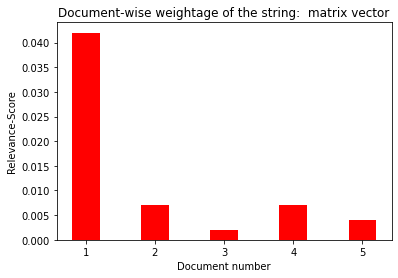



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
3
THANK YOU
Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit


KeyboardInterrupt: ignored

In [ ]:
while(1):
    print("Please choose an option:\n"
    + "1: Search keywords \n"
    + "2: View Documents \n"
    + "3: Exit")
    opt = int(input())
    if(opt == 1):
        print("Enter keyword you want to search\n")
        s = input()
        print("Loading your search results...")
        search(s)
        print("\n")
    elif (opt == 2):
        print("Enter Document number:\n\n")
        doc_n = int(input())

        if(doc_n>len(store)):
            print("There are only ",len(store)," documents")
            continue
        print(store[doc_n - 1])
        print("\n")
    elif( opt == 3):
        print("THANK YOU")
        exit()
    else:
        print("Enter valid input. ")